# 01 Import Libraries and Dataframes

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Import Orders & Products dataframe
path = r'/Users/Nick/Documents/CareerFoundry/Immersion 4/Instacart Basket Analysis 11.11.21/02 Data/Prepared Data'
ords_prods_merge = pd.read_pickle(os.path.join(path, 'orders_products_merged_agg_flag.pkl'))

In [5]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_item_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy day,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy day,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy day,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy day,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy day,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


# 02 Creating Bar Charts

<AxesSubplot:>

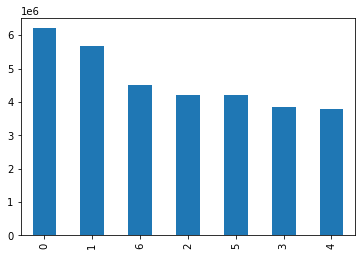

In [6]:
#Use order_day_of_week frequency count for bar chart
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

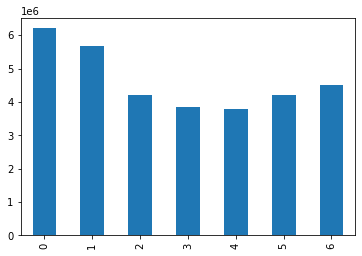

In [7]:
#Same chart with x-axis ordered by index
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

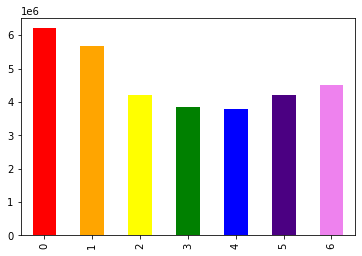

In [8]:
#Add color
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

# 03 Exporting Charts

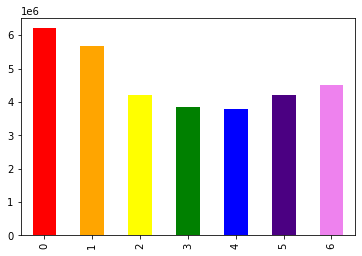

In [9]:
#Set visualization folder path variable
vis_path = r'/Users/Nick/Documents/CareerFoundry/Immersion 4/Instacart Basket Analysis 11.11.21/04 Analysis/Visualizations'
#Set variable for bar chart
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

In [10]:
#Export/Save bar variable as a figure
bar.figure.savefig(os.path.join(vis_path, 'bar_orders_dow.png'))

# 04 Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

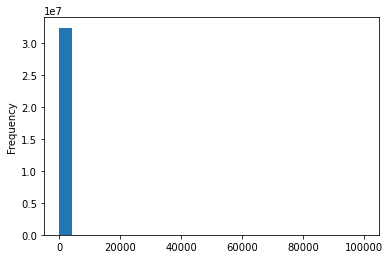

In [11]:
#Create prices histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

#### The histogram is broken because of an outlier.

### Identify outliers:

<AxesSubplot:xlabel='prices', ylabel='prices'>

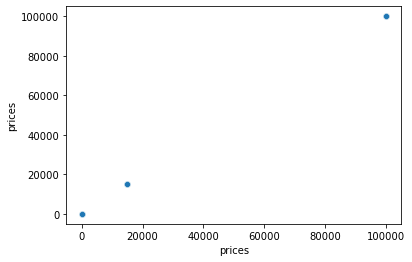

In [12]:
#Create prices v prices scatterplot 
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [14]:
#Find rows with prices > 100
ords_prods_merge['prices'].loc[ords_prods_merge['prices'] > 100]

10030345    14900.0
10030346    14900.0
10030347    14900.0
10030348    14900.0
10030349    14900.0
             ...   
29166209    99999.0
29166210    99999.0
29166211    99999.0
29166212    99999.0
29166213    99999.0
Name: prices, Length: 5127, dtype: float64

In [16]:
#Set all values above 100 to NaN
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [17]:
#Check new max price
ords_prods_merge['prices'].max()

25.0

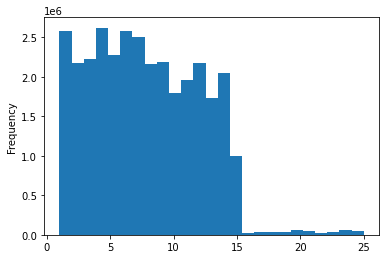

In [18]:
#Create histogram, take two
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

In [19]:
#Export histogram
hist.figure.savefig(os.path.join(vis_path, 'hist_prods_prices.png'))

# 05 Sampling Data

In [20]:
#Split data into a random 70/30
np.random.seed(4) #reproducibly random
dev = np.random.rand(len(ords_prods_merge)) <= 0.7 #boolean list
big = ords_prods_merge[dev] #70
small = ords_prods_merge[~dev] #30

In [21]:
#Check that (big + small) rows = all rows
len(ords_prods_merge) == len(big) + len(small)

True

In [22]:
#Reduce sample to needed columns
df = big[['order_day_of_week', 'prices']]
df_2 = small[['order_day_of_week', 'prices']]

# 06 Creating Line Charts

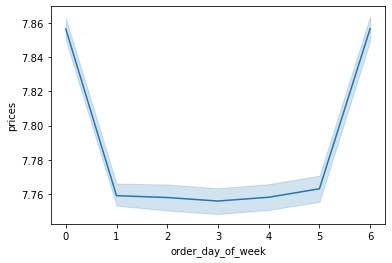

In [23]:
#Create line chart using reduced small sample
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

In [24]:
#Export line chart
line.figure.savefig(os.path.join(vis_path, 'line_prices_v_dow_sample'))